**EXERCISE_12**

**12.1**

**AGGIUNGERE I COMMENTI**

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2024-06-08 19:22:41.776157: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-08 19:22:41.833086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-08 19:22:41.833123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-08 19:22:41.834592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-08 19:22:41.844473: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-08 19:22:41.845509: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 9


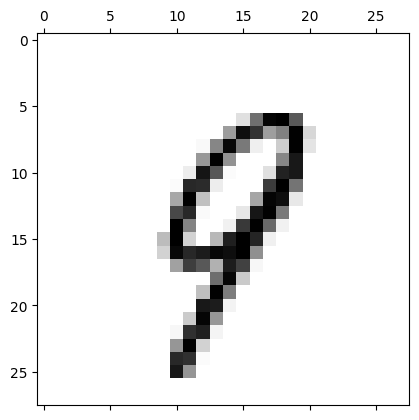

... and with label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[22])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[22,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[22], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(50, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


**1-ADADELTA**

In [ ]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(lr=1.0, rho=0.95,),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

In [ ]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

In [ ]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

**2-SGD**

In [ ]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

In [ ]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

In [ ]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

**3-ADAM**

In [ ]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

In [ ]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

In [ ]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

**12.2**

**Creating Convolutional Neural Nets with Keras**

In [5]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [6]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(7, 7),
                     activation='relu',
                     input_shape=input_shape))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # add a convolution layer with 20 filters
    model.add(Conv2D(20, kernel_size=(3, 3),
                     activation='relu',))
    # apply a pooliing with dimension 4x4
    model.add(MaxPooling2D(pool_size=(4, 4)))
    # apply a standard flat layer
    model.add(Flatten())
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [7]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_CNN = create_CNN()

# train DNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20


2024-06-08 19:23:01.527460: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 25s 13ms/step - loss: 0.6215 - acc: 0.8001 - val_loss: 0.2257 - val_acc: 0.9407
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1991 - acc: 0.9413 - val_loss: 0.1498 - val_acc: 0.9606
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1563 - acc: 0.9531 - val_loss: 0.1250 - val_acc: 0.9670
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1323 - acc: 0.9599 - val_loss: 0.1127 - val_acc: 0.9691
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1198 - acc: 0.9642 - val_loss: 0.0998 - val_acc: 0.9743
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1106 - acc: 0.9672 - val_loss: 0.0895 - val_acc: 0.9768
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1027 - acc: 0.9685 - val_loss: 0.0885 - val_acc: 0.9783
Epoch 8/20
1875/1875 [==============================] - 21s

313/313 [==============================] - 1s 4ms/step - loss: 0.0905 - acc: 0.9784

Test loss: 0.09052734076976776
Test accuracy: 0.9783999919891357


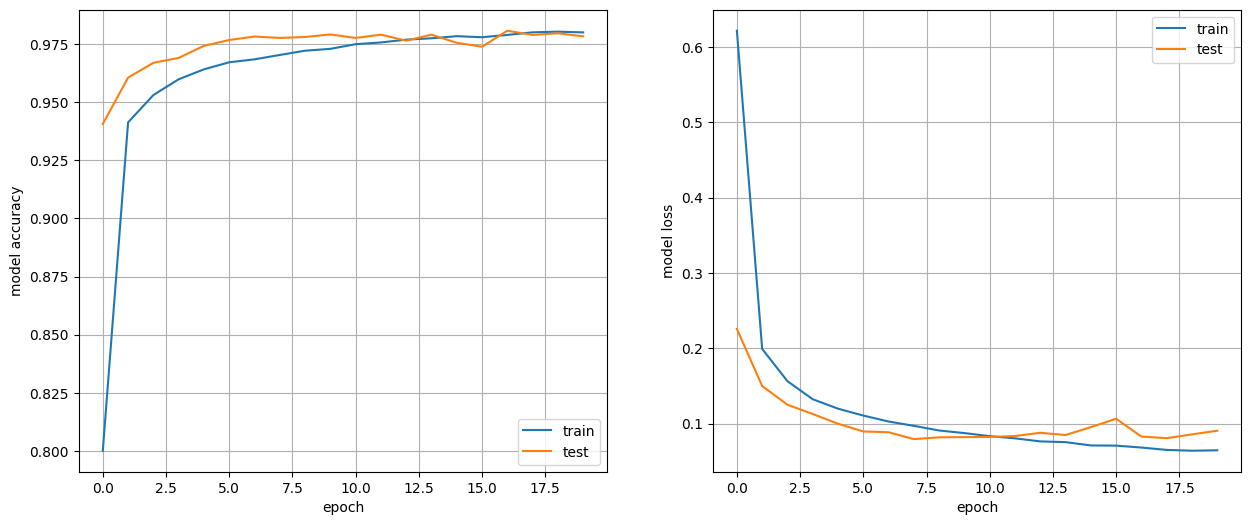

In [8]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 4ms/step


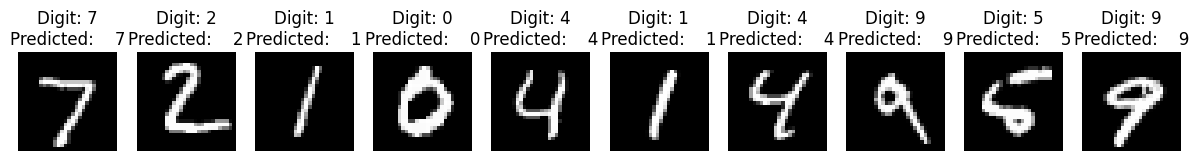

In [9]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

**12.3**

Image size: 28x28


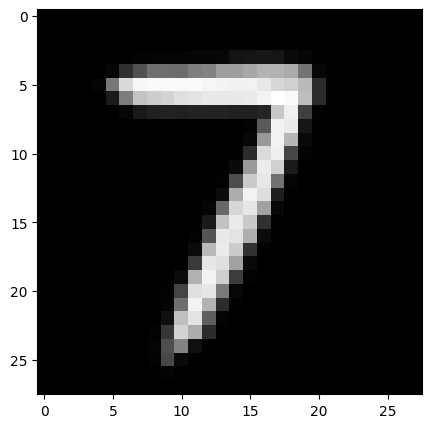

(28, 28)


In [10]:
from PIL import Image
import os

digit_filename = "./7_write.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 25ms/step


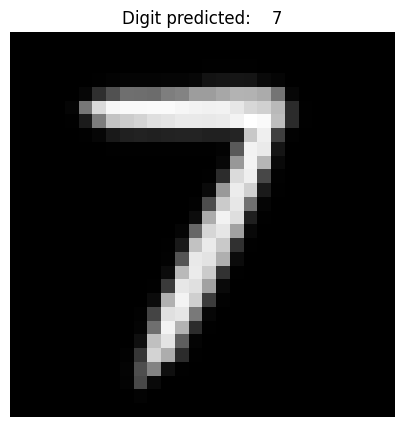

In [11]:
print(data.shape)
data = data.reshape(1,xdim,ydim,1)
print(data.shape)
pred_8 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_8)))
plt.axis('off') 
plt.show()

Image size: 28x28


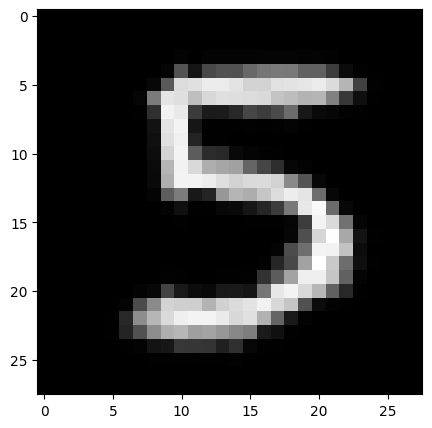

(28, 28)


In [12]:
digit_filename = "./5_write.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 23ms/step


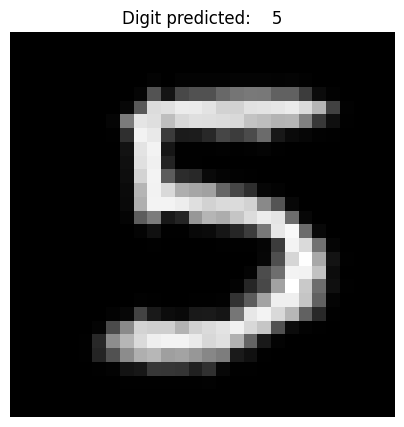

In [13]:
print(data.shape)
data = data.reshape(1,xdim,ydim,1)
print(data.shape)
pred_8 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_8)))
plt.axis('off') 
plt.show()